# K-Nearest Neighbor 필기체 인식 시스템

1. 폴더의 데이터를 읽어서 **숫자를 인식하는 알고리즘 개발**<br>
2. 인식 결과와 실제 라벨을 확인하여 **에러율 반환** (k를 1부터 20까지 변화시키며 에러율 출력)<br>
   *cf. 에러율 = 예측을 실패한 경우 / 전체 파일 개수 * 100*

> **trainingDigits**: N_M.txt (N: 숫자, M: 데이터ID)<br>
> **testDigits**: N_M.txt (N: 숫자, M: 데이터ID)

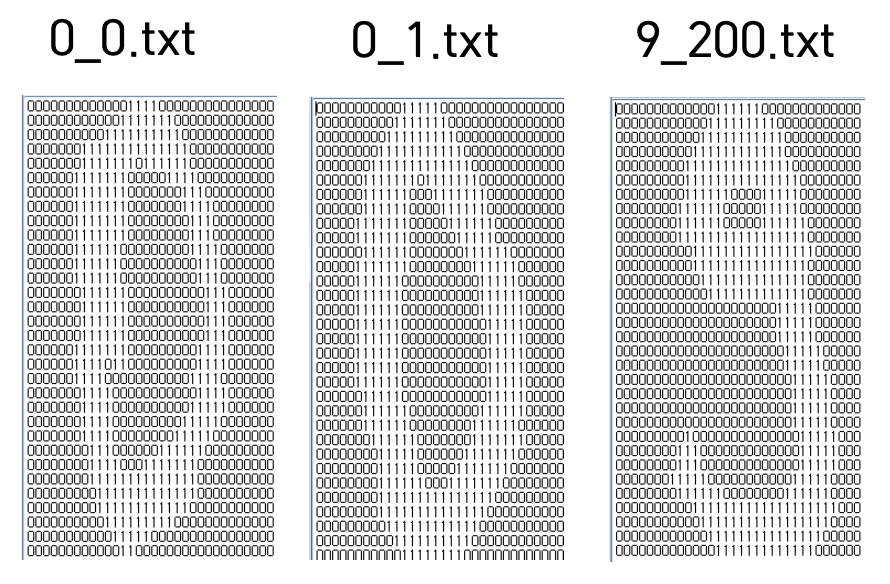

In [7]:
from IPython.display import Image
Image("필기체.png")

# 0. Import library

In [8]:
from numpy import *
from os import listdir
import operator
import os
import numpy as np

# 1. Load Data

In [9]:
# Test 데이터셋 불러오기
path2 = '/Users/kkkuleee/Documents/testDigits/'
file_list2 = os.listdir(path2)
file_list_py2 = [file for file in file_list2 if file.endswith('.txt')]

# 2. Developing

In [10]:
for h in range(1,21):
    
    path = '/Users/kkkuleee/Documents/trainingDigits/'
    file_list = os.listdir(path)
    file_list_py = [file for file in file_list if file.endswith('.txt')]

    # Train 데이터셋 가져오기
    data_list = []

    for i in file_list_py:
        with open(path + i) as f:
            text = f.read()
            text_split = text.split('\n')
            data_list.append(text_split)

    data_array = np.array([data_list])

    
    # kNN 알고리즘
    def classify0(inX, dataSet, labels, k):
        dataSetSize = dataSet.shape[0]
        diffMat = tile(inX, (dataSetSize, 1)) - dataSet
        sqDiffMat = diffMat ** 2
        sqDistances = sqDiffMat.sum(axis = 1)
        distances = sqDistances ** 0.5
        sortedDistIndicies = distances.argsort()
        classCount={}

        for i in range(k):
            voteIlabel = labels[sortedDistIndicies[i]]
            classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
        sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
        return sortedClassCount[0][0]

    def img2vector(filename):
        returnVect = zeros((1, len(data_list)))
        fr = open(filename)
        for i in range(32):
            lineStr = fr.readline()
            for j in range(32):
                returnVect[0, 32*i+j] = int(lineStr[j])
        return returnVect


    # 모델 학습
    hwLabels = []
    trainingFileList = listdir('/Users/kkkuleee/Documents/trainingDigits/')
    m = len(trainingFileList)
    trainingMat = zeros((m, len(data_list)))

    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        trainingMat[i, :] = img2vector('/Users/kkkuleee/Documents/trainingDigits/%s' % fileNameStr)

    label = []
    for i in file_list_py2:
        label.append(int(i[0][0]))

    predict = []


    # 에러율 예측
    for i in file_list_py2:
        testData = img2vector('/Users/kkkuleee/Documents/testDigits/%s' % i)            
        classifierResult = classify0(testData, trainingMat, hwLabels, h)
        predict.append(int(classifierResult))

    error_count = 0

    for i in range(len(label)):
        if label[i] != predict[i]:
            error_count += 1

    print(int(error_count / len(file_list_py2)*100))

0
0
0
0
1
1
1
1
2
2
2
2
2
2
2
2
1
1
1
2
